In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

2024-07-22 22:58:59.865176: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-22 22:59:00.042184: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-22 22:59:00.224819: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-22 22:59:00.375559: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-22 22:59:00.414958: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-22 22:59:00.685644: I tensorflow/core/platform/cpu_feature_gu

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
y_train = y_train.reshape(-1)

In [5]:
y_test = y_test.reshape(-1,)

In [6]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [7]:
class_labels = ['airplane', 'automobile', 'bird', 'cat',
                'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
def plot_sample(X, y, class_labels, index):
    plt.figure(figsize=(10, 1))
    plt.imshow(X[index])
    plt.xlabel(class_labels[y[index]])

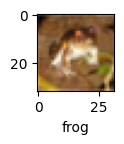

In [9]:
plot_sample(X_train, y_train, class_labels, 0)

In [10]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [11]:
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32, 32, 3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ])

    tb_callback = tf.keras.callbacks.TensorBoard(
        log_dir="logs/ANN", histogram_freq=1)

    model.compile(
        optimizer='SGD',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model, tb_callback

In [13]:
%%timeit -n1 -r1
model, tb_callback = get_model()
model.fit(X_train_scaled, y_train, epochs=5, callbacks=[tb_callback])

/home/animesh/miniconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5


2024-07-22 22:59:26.741253: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3057 - loss: 1.9260

2024-07-22 23:00:49.933084: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2211840000 exceeds 10% of free system memory.
2024-07-22 23:00:51.481573: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 720000000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 54ms/step - accuracy: 0.3058 - loss: 1.9258
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4225 - loss: 1.6398

2024-07-22 23:02:18.107748: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2211840000 exceeds 10% of free system memory.
2024-07-22 23:02:19.381782: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 720000000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - accuracy: 0.4225 - loss: 1.6397
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 54ms/step - accuracy: 0.4532 - loss: 1.5530
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.4745 - loss: 1.4931
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.4947 - loss: 1.4340
7min 1s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [14]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/CNN", histogram_freq=1)

model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_scaled, y_train, epochs=5, callbacks=[tb_callback])

/home/animesh/miniconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 74ms/step - accuracy: 0.2303 - loss: 2.1221
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 108s 69ms/step - accuracy: 0.4286 - loss: 1.5881
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 107s 69ms/step - accuracy: 0.5174 - loss: 1.3668
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 75ms/step - accuracy: 0.5607 - loss: 1.2443
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 75ms/step - accuracy: 0.6033 - loss: 1.1326


In [22]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4466 - loss: 229.0406


[230.32847595214844, 0.4526999890804291]

In [17]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


In [18]:
y_classes = [np.argmax(element) for element in y_pred]

In [15]:
from sklearn.metrics import classification_report

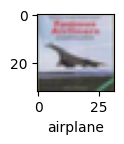

In [19]:
plot_sample(X_test, y_test,class_labels,3)

In [21]:
print(classification_report(y_test, y_classes, target_names=class_labels))

              precision    recall  f1-score   support

    airplane       0.12      0.99      0.22      1000
  automobile       0.11      0.07      0.08      1000
        bird       0.23      0.10      0.14      1000
         cat       0.22      0.18      0.20      1000
        deer       0.14      0.00      0.01      1000
         dog       0.15      0.00      0.00      1000
        frog       0.00      0.00      0.00      1000
       horse       0.00      0.00      0.00      1000
        ship       0.00      0.00      0.00      1000
       truck       0.00      0.00      0.00      1000

    accuracy                           0.14     10000
   macro avg       0.10      0.14      0.07     10000
weighted avg       0.10      0.14      0.07     10000



/home/animesh/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/animesh/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/animesh/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
